In [1]:
from imblearn.over_sampling import SMOTE


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestRegressor

In [3]:
os.getcwd()
os.chdir("D:\\Data Science\\India ML Hiring")
os.getcwd()

'D:\\Data Science\\India ML Hiring'

In [4]:
#Let's load the train and test data
train1=pd.read_csv("train.csv")
test1=pd.read_csv("test.csv")

In [5]:
train1.head(5)
df=train1['m13']
test1.head(5)
df.head(3)

0    1
1    1
2    1
Name: m13, dtype: int64

In [6]:
#let's create a new dataframe train2 by droping target variable
m13=train1['m13']
train2=train1.drop(['m13','loan_id'],axis=1)
train2.head(3)
test1=test1.drop(['loan_id'],axis=1)

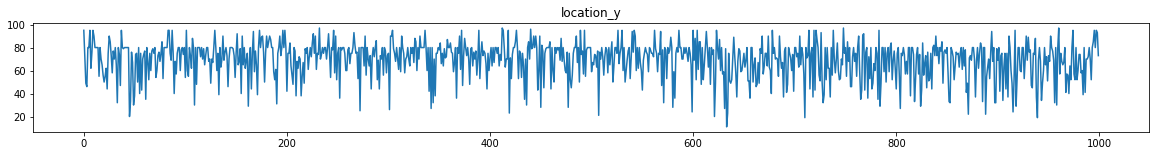

In [8]:
plt.figure(figsize=(20, 2))
plt.plot(train2['loan_to_value'][:1000])
plt.title('location_y')
plt.show()


In [12]:
import seaborn as sns
# This function returns the count plot of a column with percentage of each class
def plot_bar_counts_categorical(data_se, title, figsize, sort_by_counts=False):
    info = data_se.value_counts()
    info_norm = data_se.value_counts(normalize=True)
    categories = info.index.values
    counts = info.values
    counts_norm = info_norm.values
    fig, ax = plt.subplots(figsize=figsize)
    if data_se.dtype in ['object']:
        if sort_by_counts == False:
            inds = categories.argsort()
            counts = counts[inds]
            counts_norm = counts_norm[inds]
            categories = categories[inds]
        ax = sns.barplot(counts, categories, orient = "h", ax=ax)
        ax.set(xlabel="count", ylabel=data_se.name)
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts):
            ax.text(da, n, str(da)+ ",  " + str(round(counts_norm[n]*100,2)) + " %", fontsize=10, va='center')
    else:
        inds = categories.argsort()
        counts_sorted = counts[inds]
        counts_norm_sorted = counts_norm[inds]
        ax = sns.barplot(categories, counts, orient = "v", ax=ax)
        ax.set(xlabel=data_se.name, ylabel='count')
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts_sorted):
            ax.text(n, da, str(da)+ ",  " + str(round(counts_norm_sorted[n]*100,2)) + " %", fontsize=10, ha='center')

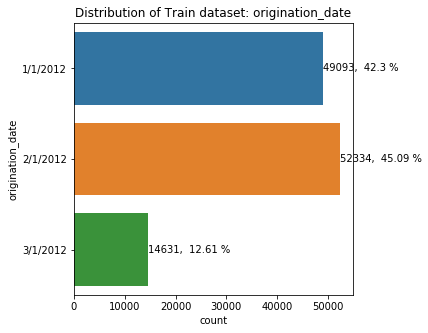

In [13]:
plot_bar_counts_categorical(train2['origination_date'], 'Train dataset: origination_date', (5,5))

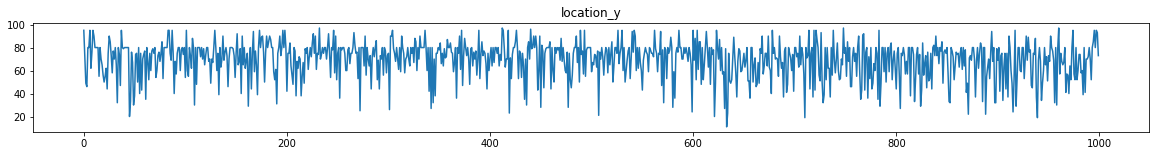

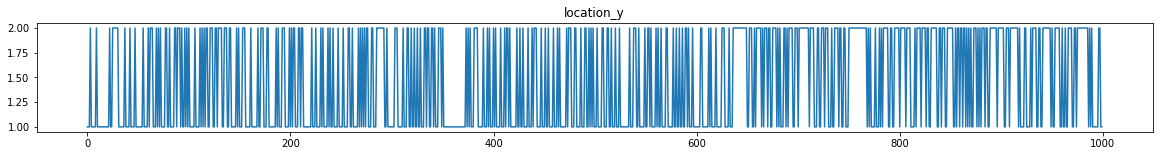

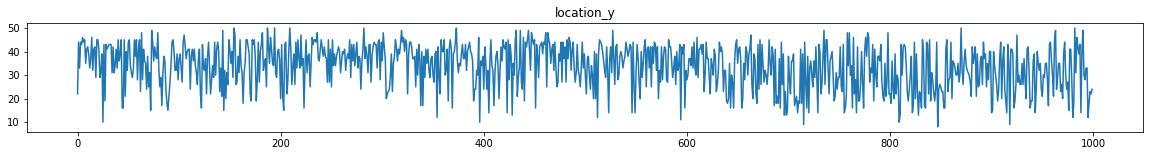

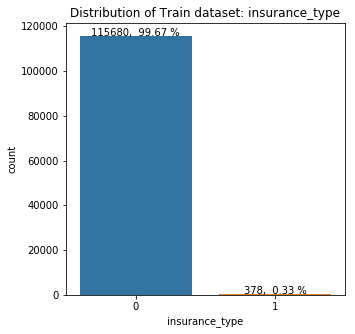

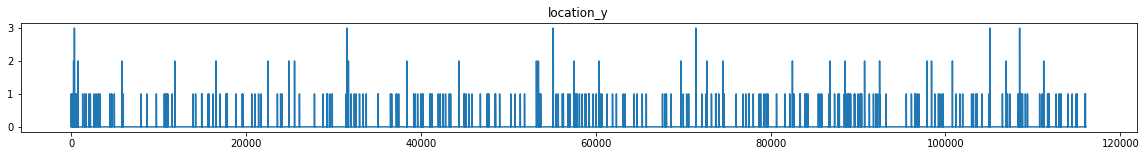

KeyError: 'm13'

<Figure size 1440x144 with 0 Axes>

In [14]:
plt.figure(figsize=(20, 2))
plt.plot(train2['loan_to_value'][:1000])
plt.title('location_y')
plt.show()


# In[19]:


plt.figure(figsize=(20, 2))
plt.plot(train2['number_of_borrowers'][:1000])
plt.title('location_y')
plt.show()


# In[20]:


plt.figure(figsize=(20, 2))
plt.plot(train2['debt_to_income_ratio'][:1000])
plt.title('location_y')
plt.show()


# In[21]:


plot_bar_counts_categorical(train2['insurance_type'], 'Train dataset: insurance_type', (5,5))


# In[22]:


plt.figure(figsize=(20, 2))
plt.plot(train2['m1'][:])
plt.title('location_y')
plt.show()


# In[23]:


plt.figure(figsize=(20, 2))
plt.plot(train2['m13'][:])
plt.title('location_y')
plt.show()


In [7]:
train2['origination_date']=pd.to_datetime(train2['origination_date'])

In [8]:
test1['origination_date']=pd.to_datetime(test1['origination_date'])

In [9]:
train2['first_payment_date']=pd.to_datetime(train2['first_payment_date'])

In [10]:
test1['first_payment_date']=pd.to_datetime(test1['first_payment_date'])

In [11]:
train2['totaldays']=train2['first_payment_date']-train2['origination_date']

In [12]:
test1['totaldays']=test1['first_payment_date']-test1['origination_date']

In [13]:
train2=train2.drop(['origination_date','first_payment_date'],axis=1)

In [14]:
test1=test1.drop(['origination_date','first_payment_date'],axis=1)

In [15]:
#total['totaldays']=total['totaldays'].dt.days
train2['totaldays']=train2['totaldays'].dt.days

In [16]:
test1['totaldays']=test1['totaldays'].dt.days

In [17]:
train2=pd.get_dummies(train2,columns=['source','loan_purpose','financial_institution'],drop_first=True, prefix=['source', 'loan_purpose','financial_institution'])

In [18]:
#let's create dummy variables
test1=pd.get_dummies(test1,columns=['source','loan_purpose','financial_institution'],drop_first=True, prefix=['source', 'loan_purpose','financial_institution'])

In [20]:
#let's check corr
#total.corr()
train2.corr()


,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes"
interest_rate,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,0.055883,...,-0.025026,-0.036529,-0.052941,0.002440,-0.135808,-0.012258,0.088805,0.008790,-0.078971,0.000022
unpaid_principal_bal,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,0.015985,...,0.021273,-0.021199,-0.022194,0.050260,-0.062894,0.014857,0.031139,0.016609,0.009084,-0.016791
loan_term,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,0.028731,...,-0.006632,-0.068924,-0.105934,0.064917,-0.119879,-0.023387,-0.022292,0.020507,-0.092020,0.009828
loan_to_value,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,0.075813,...,-0.002653,-0.029293,-0.027045,-0.018712,-0.028942,-0.024048,-0.021996,0.027127,-0.033048,0.026556
number_of_borrowers,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,-0.015769,...,0.000715,0.010028,0.010969,-0.006774,0.037097,0.004583,-0.002271,-0.002510,-0.000508,-0.005330
debt_to_income_ratio,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,0.016558,...,-0.005428,-0.003379,-0.016098,-0.017822,-0.047183,-0.011574,0.010295,-0.012511,-0.026478,0.004089
borrower_credit_score,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,-0.004608,...,0.019712,0.002626,0.006590,0.017968,0.016100,0.016626,0.006917,-0.006158,0.018894,-0.016826
insurance_percent,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,0.145292,...,-0.013193,-0.019943,-0.021964,-0.019595,-0.026251,-0.023399,-0.025621,0.022253,-0.022427,0.021355
co-borrower_credit_score,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,-0.016058,...,0.001645,0.009956,0.011449,-0.005661,0.037510,0.005425,-0.002135,-0.002410,0.000403,-0.005906
insurance_type,0.055883,0.015985,0.028731,0.075813,-0.015769,0.016558,-0.004608,0.145292,-0.016058,1.000000,...,0.022054,-0.003657,-0.004610,-0.004919,-0.005826,-0.007155,-0.014343,0.064088,-0.004293,0.021742


In [39]:
m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [ ]:
cor(train2[''])

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train2, m13, test_size=0.25, random_state=27)

In [22]:
    from sklearn.ensemble import RandomForestClassifier
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, rfc_pred)

0.9955195588488712

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, rfc_pred)

0.4396551724137931

In [25]:
from sklearn.metrics import recall_score
recall_score(y_test, rfc_pred)

0.30177514792899407

In [125]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier
smote = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred1 = smote.predict(X_test)

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, rfc_pred1)

0.4761904761904762

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, rfc_pred1)

0.3668639053254438

In [31]:
score = smote.score(X_test, y_test)
print(score)

0.9952438393934172


In [32]:
output=smote.predict(test1).astype(int)

In [33]:
temp=pd.read_csv("test.csv")


In [34]:
df_output = pd.DataFrame()
df_output['loan_id'] = temp['loan_id']
df_output['m13'] = output
df_output[['loan_id','m13']].to_csv('D:\\Data Science\\India ML Hiring\\output2.csv', index=False)
    

In [35]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)

In [36]:
y_pred = model.predict(X_test)

In [37]:
f1_score(y_test, y_pred)#Aadaboost with smote has given best F1 score as of now

0.4797507788161994

In [42]:
output=model.predict(test1).astype(int)
temp=pd.read_csv("test.csv")
df_output = pd.DataFrame()
df_output['loan_id'] = temp['loan_id']
df_output['m13'] = output
df_output[['loan_id','m13']].to_csv('D:\\Data Science\\India ML Hiring\\output3.csv', index=False)

In [40]:
from sklearn.linear_model import LogisticRegression
smote1 = LogisticRegression(solver='liblinear').fit(X_train, y_train)


In [41]:
smote_pred = smote1.predict(X_test)
f1_score(y_test, smote_pred)

0.08460365853658536

In [43]:
#Let's try oversampling now
X_train, X_test, y_train, y_test = train_test_split(train2, m13, test_size=0.25, random_state=27)

In [57]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)



In [45]:
# separate minority and majority classes
not_fraud = X[X.m13==0]
fraud = X[X.m13==1]

In [51]:
# upsample minority

from sklearn.utils import resample
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results


In [53]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.m13.value_counts()

1    86576
0    86576
Name: m13, dtype: int64

In [54]:
y_train = upsampled.m13
X_train = upsampled.drop('m13', axis=1)

In [55]:
abcd = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model12 = abcd.fit(X_train, y_train)

In [56]:
y_pred12 = model12.predict(X_test)
f1_score(y_test, y_pred12)#oversampling is not the solution as F1 score is reduced drasically

0.06846733668341708

In [58]:
X_train, X_test, y_train, y_test = train_test_split(train2, m13, test_size=0.25, random_state=27)
sm1 = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm1.fit_sample(X_train, y_train)

In [20]:

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [64]:
ad=xgb.XGBClassifier(max_depth=10,
                                 subsample=0.7,
                                 n_estimators=500,
                                 min_child_weight=0.05,
                                 colsample_bytree=0.3,
                                 learning_rate=0.1)
model13=ad.fit(X_train, y_train)

In [66]:
X_test=X_test.values
y_pred13 = model13.predict(X_test)


In [67]:

f1_score(y_test, y_pred13)#

0.46721311475409844

In [30]:
#let's fine tune Random forest model
smote2 = RandomForestClassifier(n_estimators=500, random_state=100).fit(X_train, y_train)

# predict on test set
rfc_pred3 = smote2.predict(X_test)

In [31]:
f1_score(y_test, rfc_pred3)#F score has increased reasonably but strangely It's didn't perform well while making prediction


0.49056603773584906

In [32]:
output=smote2.predict(test1).astype(int)
temp=pd.read_csv("test.csv")
df_output = pd.DataFrame()
df_output['loan_id'] = temp['loan_id']
df_output['m13'] = output
df_output[['loan_id','m13']].to_csv('D:\\Data Science\\India ML Hiring\\output5.csv', index=False)

In [44]:
#let's try to fine tune adaboost
from sklearn.ensemble import AdaBoostClassifier
abad = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.45)
moda = abad.fit(X_train, y_train)
preda = moda.predict(X_test)

In [45]:
f1_score(y_test, preda)#Best result model

0.5105105105105106

In [39]:
output=abad.predict(test1).astype(int)
temp=pd.read_csv("test.csv")
df_output = pd.DataFrame()
df_output['loan_id'] = temp['loan_id']
df_output['m13'] = output
df_output[['loan_id','m13']].to_csv('D:\\Data Science\\India ML Hiring\\output6.csv', index=False)